In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai import *
from fastai.vision import *


In [0]:
folder = 'tennis'
filename = 'tennis.txt'

In [0]:
folder = 'badminton'
filename = 'badminton.txt'

In [0]:
path = Path('data/sport')
dest = path/folder
dest.mkdir(parents = True,exist_ok = True)

In [0]:
classes = ['tennis','badminton']

In [0]:
download_images(path/filename,dest,max_pics = 200)

Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '

In [0]:
for c in classes:
  print(c)
  verify_images(path/c,delete=True,max_workers=8)


tennis


badminton


In [0]:
data = ImageDataBunch.from_folder(path,train='.',valid_pct=0.2,num_workers = 4,size=224,ds_tfms = get_transforms())

In [0]:
print(data.classes),print(data.c)



['badminton', 'tennis']
2


(None, None)

In [0]:
len(data.valid_ds)

64

In [0]:
len(data.train_ds)

256

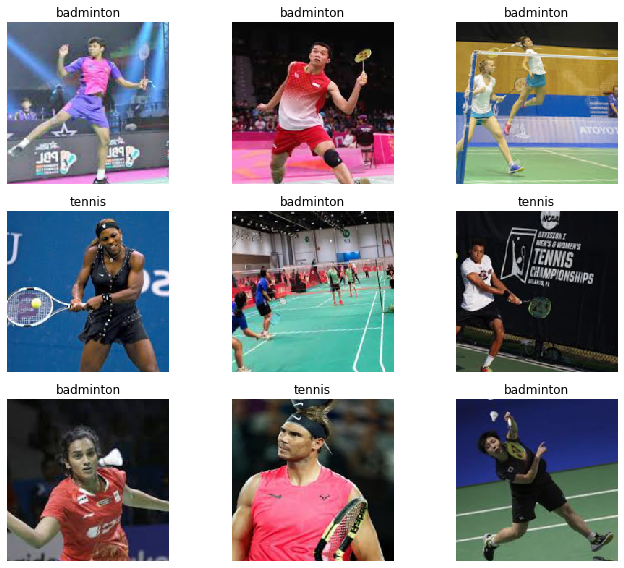

In [0]:
data.show_batch(rows=3,figsize=(10,8))

In [0]:
learn = cnn_learner(data,models.resnet34,metrics= error_rate)

In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.157562,0.436725,0.140625,00:04
1,0.706258,0.388084,0.109375,00:03
2,0.572538,0.264873,0.062500,00:03
3,0.445078,0.258087,0.062500,00:03


In [0]:
interp = ClassificationInterpretation.from_learner(learn)

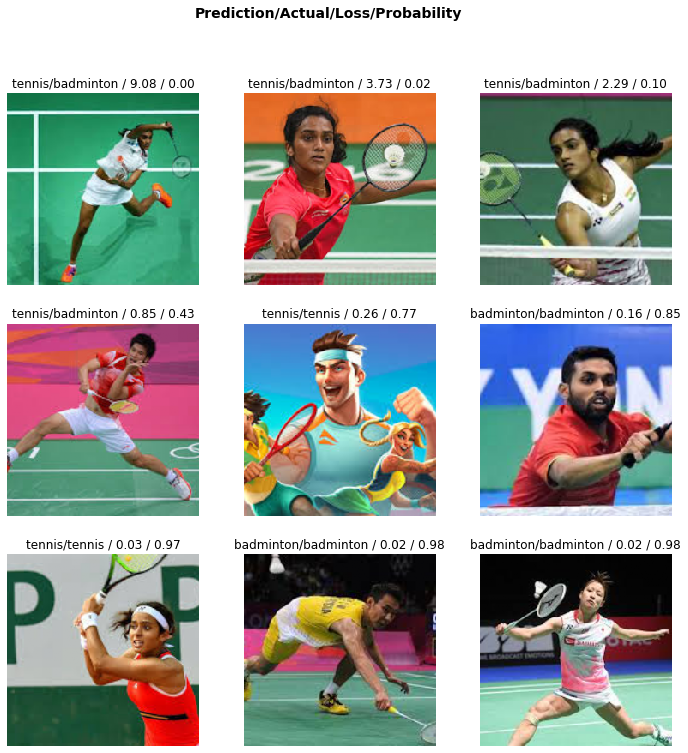

In [0]:
interp.plot_top_losses(9
                       )

In [0]:
interp.most_confused()

[('badminton', 'tennis', 4)]

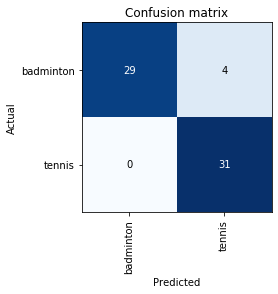

In [0]:
interp.plot_confusion_matrix()

In [0]:
learn.save("stage-1")

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


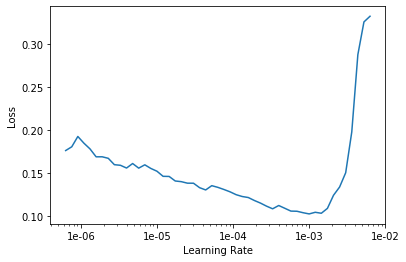

In [0]:
learn.recorder.plot()

In [0]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (256 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
badminton,badminton,badminton,badminton,badminton
Path: data/sport;

Valid: LabelList (64 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
tennis,tennis,tennis,tennis,badminton
Path: data/sport;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1

In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(4,max_lr=slice(1e-06,1e-04))

epoch,train_loss,valid_loss,error_rate,time
0,0.146541,0.263876,0.046875,00:03
1,0.125316,0.226684,0.046875,00:03
2,0.110378,0.236088,0.046875,00:03
3,0.113353,0.256017,0.046875,00:03


In [0]:
interp = ClassificationInterpretation.from_learner(learn)

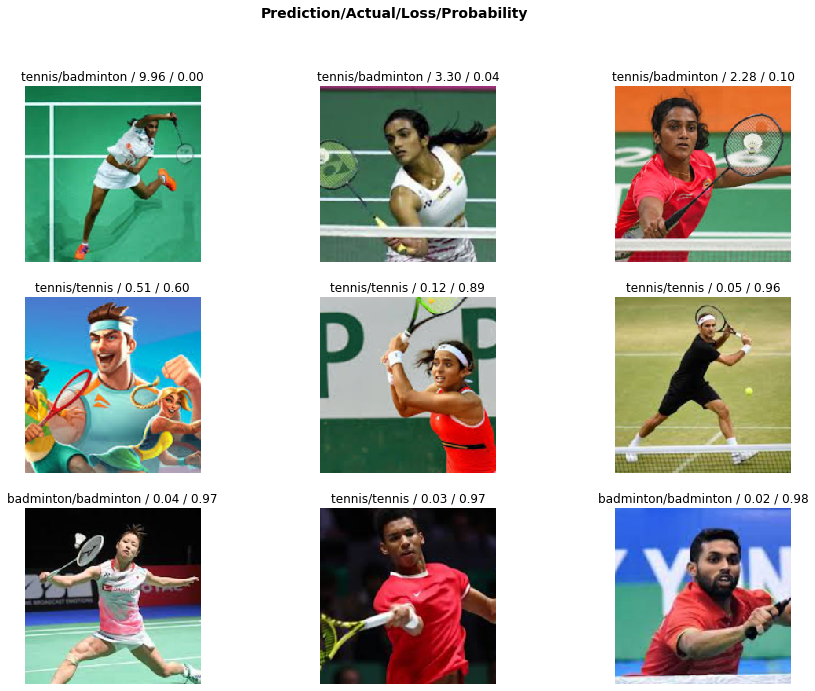

In [0]:
interp.plot_top_losses(9,figsize=(15,11))

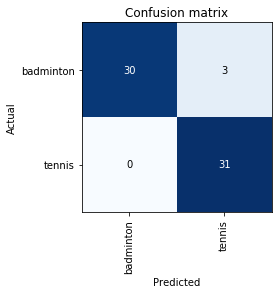

In [0]:
interp.plot_confusion_matrix()

In [0]:
learn.export()

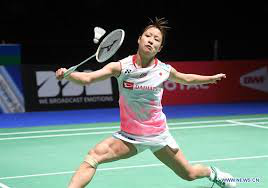

In [0]:
img = open_image(path/'badminton'/'00000024.jpg')
img

In [0]:
learn = load_learner(path)

In [0]:
preds,idxs,outputs = learn.predict(img)

In [0]:
preds

Category badminton